<a href="https://colab.research.google.com/github/madhurendra0089/Assignment/blob/main/conn_fMRI_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow import keras
from keras.losses import sparse_categorical_crossentropy
from keras import layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, UpSampling2D
from keras.utils import to_categorical


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# directory and path
path = '/content/drive/MyDrive/alzheimer/connectivity_Measure_fMRI/'
x =  np.load(path+'padded_connectivity_measure.npy')
y =  np.load(path+'one_hot_fmri_labels.npy')

# for CNN
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
Y_train =np.argmax(y_train, axis=1)
Y_test =np.argmax(y_test, axis=1)

# for MLP
X_train = np.array([x.flatten() for x in x_train])
X_test = np.array([x.flatten() for x in x_test])
print(x_train.shape, x_test.shape, X_train.shape, X_test.shape,y_train.shape,Y_train.shape,y_test.shape, Y_test.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(116, 40, 40) (30, 40, 40) (116, 1600) (30, 1600) (116, 3) (116,) (30, 3) (30,)


# **CNN**

In [ ]:

width, height, channels=40,40,1
num_classes = 3
epochs = 10
batch_size = 5
# CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)))
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)))x
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))

# Compile
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 38, 38, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 36, 36, 32)        9248      
                                                                 
 batch_normalization_6 (Bat  (None, 36, 36, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 18, 18, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)       

In [ ]:
# Train
cnn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
CNN_class_prob=cnn_model.predict(x_test)
y_pred = np.argmax(CNN_class_prob, axis=1)

Epoch 1/10
19/19 [==============================] - 3s 33ms/step - loss: 1.6957 - accuracy: 0.3804 - val_loss: 1.1703 - val_accuracy: 0.2917
Epoch 2/10
19/19 [==============================] - 0s 20ms/step - loss: 0.9783 - accuracy: 0.6196 - val_loss: 1.2529 - val_accuracy: 0.2917
Epoch 3/10
19/19 [==============================] - 0s 19ms/step - loss: 0.7216 - accuracy: 0.7283 - val_loss: 1.6257 - val_accuracy: 0.2917
Epoch 4/10
19/19 [==============================] - 0s 19ms/step - loss: 0.4415 - accuracy: 0.8804 - val_loss: 1.4693 - val_accuracy: 0.2917
Epoch 5/10
19/19 [==============================] - 0s 19ms/step - loss: 0.3179 - accuracy: 0.9130 - val_loss: 1.2515 - val_accuracy: 0.3750
Epoch 6/10
19/19 [==============================] - 0s 19ms/step - loss: 0.1352 - accuracy: 0.9783 - val_loss: 1.1930 - val_accuracy: 0.3750
Epoch 7/10
19/19 [==============================] - 0s 19ms/step - loss: 0.0543 - accuracy: 1.0000 - val_loss: 1.4972 - val_accuracy: 0.2917
Epoch 8/10
19

In [ ]:
def performance(y_test, y_pred):
    # model's performance
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    ConfusionMatrixDisplay(cm, display_labels=None).plot()

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro',zero_division='warn'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Confusion Matrix:
[[4 9 0]
 [3 6 0]
 [3 5 0]]
Accuracy: 0.3333333333333333
Precision: 0.2333333333333333
Recall: 0.3247863247863248
F1 Score: 0.2538730634682658


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


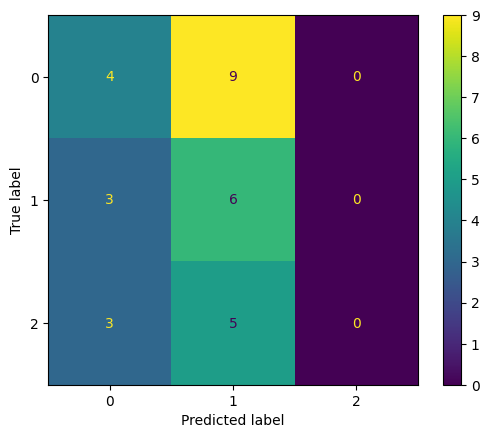

In [ ]:
performance(Y_test, y_pred)


# **MLP**

Confusion Matrix:
[[12  8  6]
 [ 1  1  0]
 [ 0  0  2]]
Accuracy: 0.5
Precision: 0.4280626780626781
Recall: 0.6538461538461539
F1 Score: 0.39906759906759914


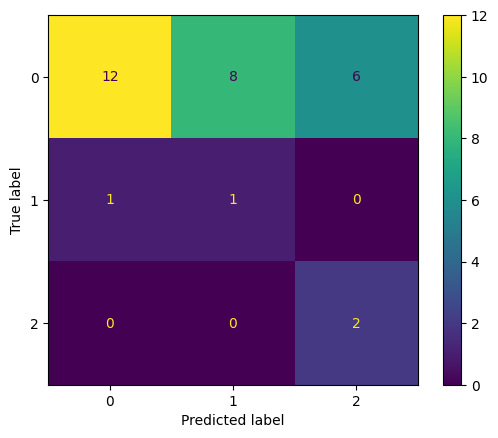

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(200, 100, 100, 75, 50, 20, 10), activation='relu', solver='adam', learning_rate_init=0.0001, max_iter=500, random_state=42)

MLP.fit(X_train, y_train)
Y_pred = np.argmax(MLP.predict(X_test), axis=1)
performance(Y_pred, Y_test)

# **Ensemble-1**

Confusion Matrix:
[[8 8 5]
 [5 1 1]
 [0 0 2]]
Accuracy: 0.36666666666666664
Precision: 0.3254985754985755
Recall: 0.5079365079365079
F1 Score: 0.3318627450980392


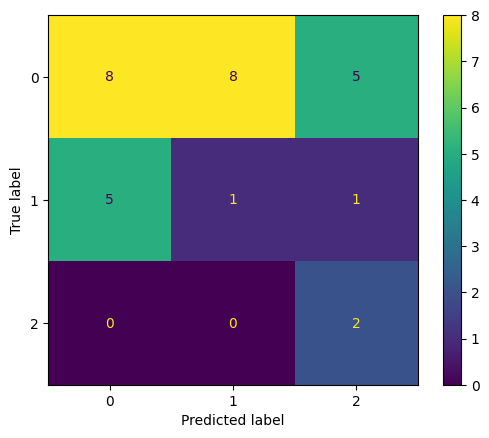

In [ ]:
MLP_class_probs = MLP.predict_proba(X_test)
ensemble_pred = np.argmax((MLP_class_probs+CNN_class_prob)/2, axis=1)
performance(ensemble_pred, Y_test)

# **Ensemble-2**

4/4 [==============================] - 0s 16ms/step
Confusion Matrix:
[[7 7 4]
 [4 1 0]
 [2 1 4]]
Accuracy: 0.4
Precision: 0.3831908831908832
Recall: 0.3867724867724867
F1 Score: 0.3759344598054275


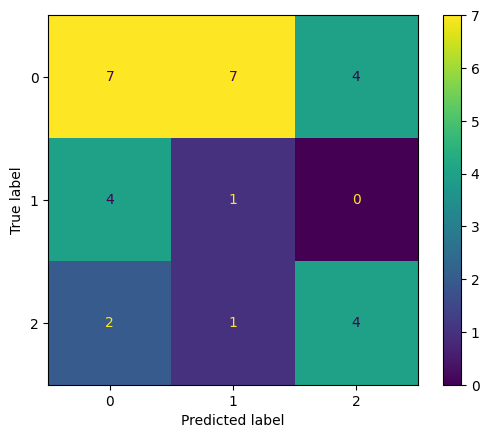

In [ ]:
MLPT_class_probs = MLP.predict_proba(X_train)
CNNT_class_prob=cnn_model.predict(x_train)

# Concatenate features
combined_features = np.concatenate((CNN_class_prob, MLP_class_probs), axis=1)
combinedT_features = np.concatenate((CNNT_class_prob, MLPT_class_probs), axis=1)


final_model = LogisticRegression()
final_model.fit(combinedT_features, Y_train)
LR_pred=final_model.predict(combined_features)
performance(LR_pred, Y_test)